# Your info

Full name:mohammad yarmoghadam

Student ID:96462104

Notice: **You can add new cells for each part.**

# Q1.A. Kohonen

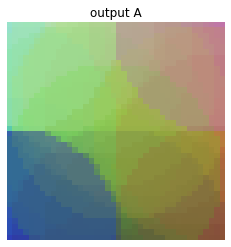

In [1]:
#write your code here
import matplotlib.pyplot as plt
import numpy as np


class SOFM:
    def __init__(self, lr, epochs):
        self.map = np.random.uniform(0, 1, size=(40, 40, 3))
        self.epochs = epochs
        self.landa = self.epochs / np.log(20)
        self.radius = 20
        self.lr = lr

    def update(self, minX, minY, x):
        for i in range(len(self.map)):
            for j in range(len(self.map[i])):
                interval = np.power(np.power((i - minX), 2) + np.power((j - minY), 2), 0.5)
                if interval < self.radius:
                    flow = np.exp(-interval / (2 * (self.radius ** 2)))
                    self.map[i][j] += flow * self.lr * (x - self.map[i][j])

    def train(self, input):
        for epoch in range(self.epochs):
            data = input[epoch % 1600]
            interval = float("inf")
            for i in range(len(self.map)):
                for j in range(len(self.map[i])):
                    if np.sqrt(np.sum(np.power((self.map[i][j] - data), 2 ))) < interval:
                        interval = np.sqrt(np.sum(np.power((self.map[i][j] - data), 2)))
                        X_min, Y_min = (i, j)
            self.update(X_min, Y_min, data)
        plt.subplot(1, 1, 1)
        plt.axis('off')
        plt.title("output A")
        plt.imshow(self.map)
        plt.show()


if __name__ == '__main__':
    data = np.ndarray((1600, 3), dtype=float)
    for i in range(len(data)):
        r = np.random.randint(0, 255)
        g = np.random.randint(0, 255)
        b = np.random.randint(0, 255)
        data[i] = [r, g, b]
    data = data / data.max()
    som = SOFM(0.1, 4800)
    som.train(data)

# Q1.B. Kohonen

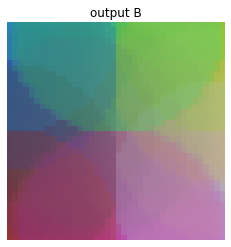

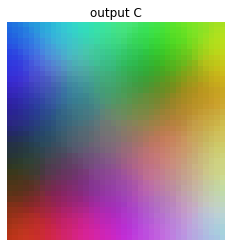

In [2]:
#write your code here
import matplotlib.pyplot as plt
import numpy as np


class SOFM:
    def __init__(self, lr, epochs):
        self.map = np.random.uniform(0, 1, size=(40, 40, 3))
        self.epochs = epochs
        self.landa = self.epochs / np.log(20)
        self.radius = 20
        self.lr = lr

    def update_weights(self, minX, minY, x):
        for i in range(len(self.map)):
            for j in range(len(self.map[i])):
                dist = np.power(np.power((i - minX), 2) + np.power((j - minY), 2), 0.5)
                if dist < self.radius:
                    influence = np.exp(-dist / (2 * (self.radius ** 2)))
                    self.map[i][j] += influence * self.lr * (x - self.map[i][j])

    def train1(self, input):
        for epoch in range(self.epochs):
            self.lr = 0.1 * np.exp(-epoch / self.landa)
            data = input[epoch % 1600]
            interval = float("inf")
            for i in range(len(self.map)):
                for j in range(len(self.map[i])):
                    if np.sqrt(np.sum(np.power((self.map[i][j] - data), 2 ))) < interval:
                        interval = np.sqrt(np.sum(np.power((self.map[i][j] - data), 2)))
                        X_min, Y_min = (i, j)
            self.update_weights(X_min, Y_min, data)
        plt.subplot(1, 1, 1)
        plt.axis('off')
        plt.title("output B")
        plt.imshow(self.map)
        plt.show()

    def train2(self, input):
        for epoch in range(self.epochs):
            self.lr = 0.1 * np.exp(-epoch / self.landa)
            self.radius = 20 * np.exp(-epoch / self.landa)
            data = input[epoch % 1600]
            interval = float("inf")
            for i in range(len(self.map)):
                for j in range(len(self.map[i])):
                    if np.sqrt(np.sum(np.power((self.map[i][j] - data), 2 ))) < interval:
                        interval = np.sqrt(np.sum(np.power((self.map[i][j] - data), 2)))
                        X_min, Y_min = (i, j)
            self.update_weights(X_min, Y_min, data)
        plt.subplot(1, 1, 1)
        plt.axis('off')
        plt.title("output C")
        plt.imshow(self.map)
        plt.show()


if __name__ == '__main__':
    data = np.ndarray((1600, 3), dtype=float)
    for i in range(len(data)):
        r = np.random.randint(0, 255)
        g = np.random.randint(0, 255)
        b = np.random.randint(0, 255)
        data[i] = [r, g, b]
    data = data / data.max()
    som = SOFM(0.04, 3200)
    som.train1(data)
    som.train2(data)

# Q2.A. MLP

-3.0 2.9999999999999605 -0.9999996829318346 0.9999996829318346
0.0 0.9999999999999998 0.0 0.9999999999999999
MSE: 0.001


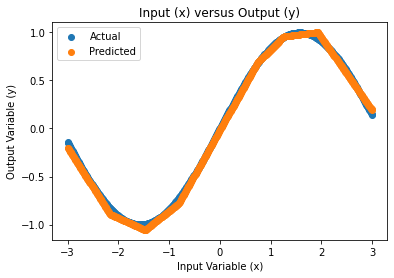

In [3]:
#write your code here
# example of fitting a neural net on x vs x^2
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from numpy import asarray
from matplotlib import pyplot
i = -3
a = []
while(i <= 3):
  a.append(i)
  i += 0.01
x = asarray(a)
y = asarray([math.sin(i) for i in x])
print(x.min(), x.max(), y.min(), y.max())
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(x, y, epochs=500, batch_size=10, verbose=0)
yhat = model.predict(x)
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
yhat_plot = scale_y.inverse_transform(yhat)
print('MSE: %.3f' % mean_squared_error(y_plot, yhat_plot))
pyplot.scatter(x_plot,y_plot, label='Actual')
pyplot.scatter(x_plot,yhat_plot, label='Predicted')
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()

# Q2.B. RBF

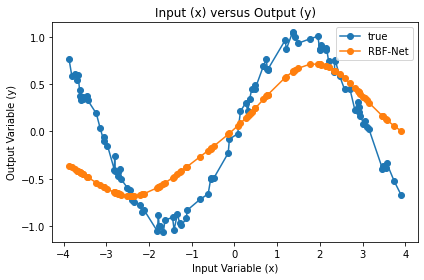

In [4]:
#write your code here
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from numpy import asarray
from matplotlib import pyplot
import numpy as np
def rbf(x, c, s):
    return np.exp(-1 / (2 * s**2) * (x-c)**2)
def kmeans(X, k):
    clusters = np.random.choice(np.squeeze(X), size=k)
    prevClusters = clusters.copy()
    stds = np.zeros(k)
    converged = False
    while not converged:
        distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
        closestCluster = np.argmin(distances, axis=1)
        for i in range(k):
            pointsForCluster = X[closestCluster == i]
            if len(pointsForCluster) > 0:
                clusters[i] = np.mean(pointsForCluster, axis=0)
        converged = np.linalg.norm(clusters - prevClusters) < 1e-6
        prevClusters = clusters.copy()
    distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
    closestCluster = np.argmin(distances, axis=1)
    clustersWithNoPoints = []
    for i in range(k):
        pointsForCluster = X[closestCluster == i]
        if len(pointsForCluster) < 2:
            clustersWithNoPoints.append(i)
            continue
        else:
            stds[i] = np.std(X[closestCluster == i])
    if len(clustersWithNoPoints) > 0:
        pointsToAverage = []
        for i in range(k):
            if i not in clustersWithNoPoints:
                pointsToAverage.append(X[closestCluster == i])
        pointsToAverage = np.concatenate(pointsToAverage).ravel()
        stds[clustersWithNoPoints] = np.mean(np.std(pointsToAverage))
    return clusters, stds
class RBFNet(object):
    def __init__(self, k=2, lr=0.01, epochs=100, rbf=rbf, inferStds=True):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.rbf = rbf
        self.inferStds = inferStds
 
        self.w = np.random.randn(k)
        self.b = np.random.randn(1)
    def fit(self, X, y):
      if self.inferStds:
        self.centers, self.stds = kmeans(X, self.k)
      else:
        self.centers, _ = kmeans(X, self.k)
        dMax = max([np.abs(c1 - c2) for c1 in self.centers for c2 in self.centers])
        self.stds = np.repeat(dMax / np.sqrt(2*self.k), self.k)
      for epoch in range(self.epochs):
        for i in range(X.shape[0]):
            a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
            F = a.T.dot(self.w) + self.b
            loss = (y[i] - F).flatten() ** 2
            error = -(y[i] - F).flatten()
            self.w = self.w - self.lr * a * error
            self.b = self.b - self.lr * error
    def predict(self, X):
      y_pred = []
      for i in range(X.shape[0]):
        a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
        F = a.T.dot(self.w) + self.b
        y_pred.append(F)
      return np.array(y_pred)
if __name__ == '__main__':
  NUM_SAMPLES = 100
  X = np.random.uniform(-4., 4., NUM_SAMPLES)
  X = np.sort(X, axis=0)
  noise = np.random.uniform(-0.1, 0.1, NUM_SAMPLES)
  y = np.sin(X)  + noise
  rbfnet = RBFNet(lr=1e-2, k=2)
  rbfnet.fit(X, y)
  y_pred = rbfnet.predict(X)
  pyplot.plot(X, y, '-o', label='true')
  pyplot.plot(X, y_pred, '-o', label='RBF-Net')
  pyplot.title('Input (x) versus Output (y)')
  pyplot.xlabel('Input Variable (x)')
  pyplot.ylabel('Output Variable (y)')
  pyplot.legend()
  pyplot.tight_layout()
  pyplot.show()

# Q2.C. Compare

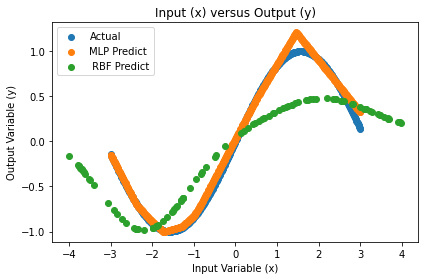

In [8]:
#write your code here
import numpy as np
def rbf(x, c, s):
    return np.exp(-1 / (2 * s**2) * (x-c)**2)
def kmeans(X, k):
    clusters = np.random.choice(np.squeeze(X), size=k)
    prevClusters = clusters.copy()
    stds = np.zeros(k)
    converged = False
    while not converged:
        distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
        closestCluster = np.argmin(distances, axis=1)
        for i in range(k):
            pointsForCluster = X[closestCluster == i]
            if len(pointsForCluster) > 0:
                clusters[i] = np.mean(pointsForCluster, axis=0)
        converged = np.linalg.norm(clusters - prevClusters) < 1e-6
        prevClusters = clusters.copy()
    distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
    closestCluster = np.argmin(distances, axis=1)
    clustersWithNoPoints = []
    for i in range(k):
        pointsForCluster = X[closestCluster == i]
        if len(pointsForCluster) < 2:
            clustersWithNoPoints.append(i)
            continue
        else:
            stds[i] = np.std(X[closestCluster == i])
    if len(clustersWithNoPoints) > 0:
        pointsToAverage = []
        for i in range(k):
            if i not in clustersWithNoPoints:
                pointsToAverage.append(X[closestCluster == i])
        pointsToAverage = np.concatenate(pointsToAverage).ravel()
        stds[clustersWithNoPoints] = np.mean(np.std(pointsToAverage))
    return clusters, stds
class RBFNet(object):
    def __init__(self, k=2, lr=0.01, epochs=100, rbf=rbf, inferStds=True):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.rbf = rbf
        self.inferStds = inferStds
 
        self.w = np.random.randn(k)
        self.b = np.random.randn(1)
    def fit(self, X, y):
      if self.inferStds:
        self.centers, self.stds = kmeans(X, self.k)
      else:
        self.centers, _ = kmeans(X, self.k)
        dMax = max([np.abs(c1 - c2) for c1 in self.centers for c2 in self.centers])
        self.stds = np.repeat(dMax / np.sqrt(2*self.k), self.k)
      for epoch in range(self.epochs):
        for i in range(X.shape[0]):
            a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
            F = a.T.dot(self.w) + self.b
            loss = (y[i] - F).flatten() ** 2
            error = -(y[i] - F).flatten()
            self.w = self.w - self.lr * a * error
            self.b = self.b - self.lr * error
    def predict(self, X):
      y_pred = []
      for i in range(X.shape[0]):
        a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
        F = a.T.dot(self.w) + self.b
        y_pred.append(F)
      return np.array(y_pred)
if __name__ == '__main__':
  i = -3
  a = []
  while(i <= 3):
    a.append(i)
    i += 0.01
  x = asarray(a)
  y = asarray([math.sin(i) for i in x])
  x = x.reshape((len(x), 1))
  y = y.reshape((len(y), 1))
  scale_x = MinMaxScaler()
  x = scale_x.fit_transform(x)
  scale_y = MinMaxScaler()
  y = scale_y.fit_transform(y)
  model = Sequential()
  model.add(Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(1))
  model.compile(loss='mse', optimizer='adam')
  model.fit(x, y, epochs=500, batch_size=10, verbose=0)
  yhat = model.predict(x)
  x_plot = scale_x.inverse_transform(x)
  y_plot = scale_y.inverse_transform(y)
  yhat_plot = scale_y.inverse_transform(yhat)
  NUM_SAMPLES = 100
  X = np.random.uniform(-4., 4., NUM_SAMPLES)
  X = np.sort(X, axis=0)
  noise = np.random.uniform(-0.1, 0.1, NUM_SAMPLES)
  y = np.sin(X)  + noise
  rbfnet = RBFNet(lr=1e-2, k=2)
  rbfnet.fit(X, y)
  y_pred = rbfnet.predict(X)
  pyplot.scatter(x_plot,y_plot, label='Actual')
  pyplot.scatter(x_plot,yhat_plot, label='MLP Predict')
  pyplot.title('Input (x) versus Output (y)')
  pyplot.xlabel('Input Variable (x)')
  pyplot.ylabel('Output Variable (y)')
  pyplot.scatter(X,y_pred, label=' RBF Predict')
  pyplot.legend()
  pyplot.tight_layout()
  pyplot.show()

# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID and use the following code to join the class: <font color='red'>**D5372R**</font>
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
   

  according to the question number.
  - There are 2 assignments in Gradescope: 

    You should upload your **codes** and your **notebook** in `HW2` section and your final report for all of the questions as a **single pdf** file in `HW2 - Report`. Autograder will automatically check for:
    - `CI992_HW2.ipynb`
    - `Q1.A. Kohonen.py`
    - `Q1.B. Koohonen.py`
    - `Q2.A. MLP.py`
    - `Q2.B. RBF.py`
    - `Q2.C. Compare.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.